Hand-In of Group 13, Jonathan Ehrengruber (jonathan.ehrengruber@students.fhnw.ch), Christian Renold (christian.renold@hslu.ch)

In [2]:
import pickle

## MNIST Data

Full classification of MNIST data.

The original MNIST dataset is used.

The following notation is used: <br>
<code>m</code>: Number of samples <br>
<code>n</code>: Number of features

Here the features refer to the pixel values of the images.


### Data Folder

The data can be loaded by using suitable functionality in sklearn which will use a dedicated folder on your local disk for caching. Specify the folder to be used. 

In [1]:
### START YOUR CODE ### 
from sklearn.datasets import fetch_openml
data_home = '../../data/mnist'
ds_name = 'mnist_784'
fetch_openml(ds_name, data_home=data_home)
### END YOUR CODE ### 

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

### Data Preparation

Some preparatory steps to be applied before training:
* Loading the data
* Some plots
* Extracting two digits and restricting the classification task to that so that the dataset is well balanced.
* Splitting the dataset into train and test
* Normalizing the intensities to the range [-1,1]

#### Plotting Utility

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

def plot_img(img, label, shape):
    """
    Plot the x array by reshaping it into a square array of given shape
    and print the label.
    
    Parameters:
    img -- array with the intensities to be plotted of shape (shape[0]*shape[1])
    label -- label 
    shape -- 2d tuple with the dimensions of the image to be plotted.
    """
    plt.imshow(np.reshape(img, shape), cmap=plt.cm.gray)
    plt.title("Label %i"%label)


def plot_digits(x,y,selection,shape, cols=5):
    """
    Plots the digits in a mosaic with given number of columns.

    Arguments:
    x -- array of images of size (n,m)
    y -- array of labels of size (1,m)
    selection -- list of selection of samples to be plotted
    shape -- shape of the images (a 2d tuple)
    selected_digits -- tuple with the two selected digits (the first associated with label 1, the second with label 0)
    """
    if len(selection)==0:
        print("No images in the selection!")
        return
    cols = min(cols, len(selection))
    rows = len(selection)/cols+1
    plt.figure(figsize=(20,4*rows))
    for index, (image, label) in enumerate(zip(x.T[selection,:], y.T[selection,:])):
        plt.subplot(rows, cols, index+1)
        plt.imshow(np.reshape(image, shape), cmap=plt.cm.gray)
        plt.title('Sample %i\n Label %i\n' % (selection[index],label), fontsize = 12)
    plt.tight_layout()

#### Load Data

In [7]:
import numpy as np
from sklearn.datasets import fetch_openml

def load_mnist(data_home):
    """
    Loads the mnist dataset, prints the shape of the dataset and 
    returns the array with the images, the array with associated labels 
    and the shape of the images.     
    Parameters: 
    data_home -- Absolute path to the DATA_HOME  
    
    Returns:
    x -- array with images of shape (784,m) where m is the number of images
    y -- array with associated labels with shape (1,m) where m is the number of images
    shape -- (28,28)
    """
    mnist = fetch_openml(name='mnist_784', version=1, cache=True, data_home=data_home)
    x, y = mnist['data'].T, np.array(mnist['target'], dtype='int').T
    m = x.shape[1]
    y = y.reshape(1,m)
    print("Loaded MNIST original:")
    print("Image Data Shape" , x.shape)
    print("Label Data Shape", y.shape)
    return x,y,(28,28)


## Split Data and bring it in the correct shape

Split the data into training set and test set.
We use the scikit-learn function 'train_test_split' and use 20% of the samples as test data.

Furthermore, we bring the input data (x) into the shape (n,m) where n is the number of input features and m the number of samples.  

In [8]:
from sklearn.model_selection import train_test_split

def prepare_train_test(x, y, test_size=0.20):
    """
    Split the dataset consisting of an array of images (shape (m,n)) and an array of labels (shape (n,))
    into train and test set.
    
    Parameters:
    x -- Array of images of shape (n,m) where m is the number of samples
    y -- Array of labels of shape (m,) where m is the number of samples
    test_size -- fraction of samples to reserve as test sample
    
    Returns:
    x_train -- list of images of shape (n,m1) used for training
    y_train -- list of labels of shape (1,m1) used for training
    x_test -- list of images of shape (n,m2) used for testing
    y_test -- list of labels of shape (1,m2) used for testing
    """
    # split 
    # We use the functionality of sklearn which assumes that the samples are enumerated with the first index 
    x_train, x_test, y_train, y_test = train_test_split(x.T, y.T, test_size=0.20, random_state=1)

    # reshape - transpose back the output obtained from the train_test_split-function
    x_train = x_train.T
    x_test = x_test.T
    m_train = x_train.shape[1]
    m_test = x_test.shape[1]
    y_train=y_train.reshape(1,m_train)
    y_test=y_test.reshape(1,m_test)

    print("Shape training set: ", x_train.shape, y_train.shape)
    print("Shape test set:     ", x_test.shape, y_test.shape)
    
    return x_train, x_test, y_train, y_test

#### Data Normalisation

Normalize the data - apply min/max normalization.


In [9]:
import numpy as np

def normalize(x_train,x_test):
    """
    Applies min/max-normalizes - min and max values computed from the training set.
    Common min and max values for all features are used.
    
    Parameters:
    x_train -- Array of training samples of shape (n,m1) where n,m1 are the number of features and samples, respectively.  
    x_test -- Array of test samples of shape (n,m2) where n,m2 are the number of features and samples, respectively. 
    
    Returns:
    The arrays with the normalized train and test samples.  
    """
    ### START YOUR CODE ###    
    x_train_min = x_train.min(axis=1).reshape(x_train.shape[0], 1)
    x_train_max = x_train.max(axis=1).reshape(x_train.shape[0], 1)
    minmax = lambda x: 2 * ((x - x_train_min) / (x_train_max - x_train_min)) - 1
    
    x_train = np.nan_to_num(minmax(x_train), copy=True)
    x_test = np.nan_to_num(minmax(x_test), copy=True)
    ### END YOUR CODE ###
    return x_train, x_test 

### Softmax

In [10]:
def predict(W, b, X):
    '''
    Compute the per class probabilities for all the m samples by using a softmax layer with parameters (W, b).
    
    Arguments:
    W -- weights, a numpy array with shape (ny, nx) (with ny=10 for MNIST).
    b -- biases, a numpy array with shape (ny,1)
    X -- input data of size (nx,m)
    
    Returns:
    A -- a numpy array of shape (ny,m) with the prediction probabilities for the digits.
    ''' 
    ### START YOUR CODE ###
    
    expz = np.exp(W.dot(X) + b)
    expz = expz / expz.sum(axis=0)
    return expz
    ### END YOUR CODE ###

#### TEST Softmax

In [11]:
W = np.array([[1,-1],[0,1],[-1,1]]).reshape(3,2)
b = np.array([0,0,0]).reshape(3,1)
X = np.array([2, 3]).reshape(2,1)
A = predict(W,b,X)

Aexp = np.array([0.01587624,0.86681333,0.11731043]).reshape(A.shape)
np.testing.assert_array_almost_equal(A,Aexp,decimal=8)
np.testing.assert_array_almost_equal(np.sum(A, axis=0), 1.0, decimal=8)

X = np.array([[2,-1,1,-1],[1,1,1,1]]).reshape(2,4)
A = predict(W,b,X)

Aexp = np.array([[0.46831053, 0.01321289, 0.21194156, 0.01321289],
 [0.46831053, 0.26538793, 0.57611688, 0.26538793],
 [0.06337894, 0.72139918, 0.21194156, 0.72139918]]
)
np.testing.assert_array_almost_equal(A,Aexp,decimal=8)
np.testing.assert_array_almost_equal(np.sum(A, axis=0), np.ones(4,dtype='float'), decimal=8)

### Cost Function (Cross Entropy)


In [12]:
def cost(Ypred, Y):
    """
    Computes the cross entropy cost function for given predicted values and labels.
    
    Parameters:
    Ypred -- prediction from softmax, a numpy array of shape (ny,m)
    Y -- ground truth labels - a numpy array with shape (1,m) containing digits 0,1,...,9. 
    
    Returns:
    Cross Entropy Cost - a scalar value
    """    
    
    ### START YOUR CODE ###

    if len(Y.shape) == 1:
        Y = Y.reshape(1, Y.shape[0])
    
    m = Y.shape[1]
    
    # Numerical safety
    unsafe = np.log(Ypred.max(axis=0))
    safe = np.nan_to_num(unsafe)
    
    J = -(1/m) * safe.sum(axis=0)
    
    ### END YOUR CODE ### 
    
    return J

#### TEST Cross Entropy Cost 

In [13]:
Y = np.array([1])
Ypred = np.array([0.04742587,0.95257413]).reshape(2,1)
J = cost(Ypred,Y)
Jexp = 0.04858735
np.testing.assert_almost_equal(J,Jexp,decimal=8)
Y = np.array([1,1,1,0])
Ypred = np.array([[1.79862100e-02, 6.69285092e-03, 4.74258732e-02, 9.99088949e-01],
                  [9.82013790e-01, 9.93307149e-01, 9.52574127e-01, 9.11051194e-04]])
Jexp = 0.01859102
J = cost(Ypred,Y)
np.testing.assert_almost_equal(J,Jexp,decimal=8)

### Update Rules for the Parameters

Different update rules associated with the different cost functions.

In [14]:
def onehot(y,n):
    """
    Constructs a one-hot-vector from a given array of labels (shape (1,m), containing numbers 0,1,...,n-1) 
    and the number of classes n.
    The resulting array has shape (n,m) and in row j and column i a '1' if the i-th sample has label 'j'. 
    
    Parameters:
    y -- labels, numpy array of shape (1,m) 
    n -- number of classes

    Returns:
    On-hot-encoded vector of shape (n,m)
    """
    
    ### START YOUR CODE ###
    m = y.shape[1]
    result = np.zeros(shape=(n, m))
    labels = y.flatten()
    rangelist = np.arange(m)
    result[labels, rangelist] = 1
    
    ### START YOUR CODE ###
    return result

In [15]:
## Test ##
Y = np.array([1,3,0]).reshape(1,3)
onehot_comp = onehot(Y,4)
onehot_exp = np.array([[0,0,1],[1,0,0],[0,0,0],[0,1,0]]).reshape(4,3)
np.testing.assert_almost_equal(onehot_exp,onehot_comp,decimal=8)

In [16]:
def gradient(X, Y, A):
    """
    Computes the update of the weights and bias - by using the cross entropy cost. 
    
    Arguments:
    X -- input data of size (nx,m)
    Y -- output labels - a numpy array with shape (1,m).
    A -- predicted scores - a numpy array with shape (ny,m) 
    
    Returns:
    gradJ -- dictionary with the gradient w.r.t. W (key "dW" with shape (ny,nx)) and w.r.t. b (key "db" with shape (ny,1))
    """
    ### START YOUR CODE ### 
    
    m = Y.shape[1]
    ny = A.shape[0]
    y_ohe = onehot(Y, ny)
    
    delta_y = (y_ohe - A)
    dW = -(1/m) * delta_y.dot(X.T)
    db = -(1/m) * delta_y.sum(axis=1).reshape(ny, 1)
    
    return {'dW': dW, 'db': db}
    
    
    ### END YOUR CODE ###
    

#### Test the Calculation of the Gradient

In [17]:
W = np.array([[1,-1],[0,1],[-1,1]]).reshape(3,2)
b = np.array([0,0,0]).reshape(3,1)
X = np.array([[2,-1,1,-1],[1,1,1,1]]).reshape(2,4)
A = predict(W,b,X)

Y = np.array([1,1,1,1]).reshape(1,4)

gradJ = gradient(X,Y,A)
dW = gradJ['dW']
db = gradJ['db']
dWexp = np.array([[ 0.28053421,0.17666947],
                  [-0.00450948,-0.60619918],
                  [-0.27602473,0.42952972]]).reshape(3,2)

dbexp = np.array([0.17666947,-0.60619918,0.42952972]).reshape(3,1)

np.testing.assert_array_almost_equal(dW,dWexp,decimal=8)
np.testing.assert_array_almost_equal(db,dbexp, decimal=8)

### Metrics for measuring the performance of the algorithm

In [18]:
def error_rate(Ypred, Y):
    """
    Compute the error rate defined as the fraction of misclassified samples.
    
    Arguments:
    Ypred -- Predicted label, a numpy array of size (1,m)
    Y -- ground truth labels, a numpy array with shape (1,m)

    Returns:
    error_rate -- an array of shape (1,m)
    """
    Ypredargmax = np.argmax(Ypred, axis=0)
    return np.sum(Y != Ypredargmax) / Y.size

### Initialize and Optimize (Learn)

#### Initialize Parameters

First we provide a utility method to generate properly intialized parameters. 

In [19]:
def initialize_params(nx, ny, random=False):
    """
    This function provides initialized parameters: a weights matrix and a bias vector. 
    
    Argument:
    nx -- number of input features
    ny -- number of output dimensions (number of different labels)
    random -- if set to True standard normal distributed values are set for the weights; otherwise zeros are used.
    
    Returns:
    w -- initialized weights matrix of shape (ny,nx)
    b -- initialized bias vector of shape (ny,1) - always initialized with zeros
    """
    if random:
        w = np.random.randn(*(ny,nx)) / np.sqrt(nx)
    else:
        w = np.zeros((ny,nx))
    
    b = 0.0
    
    return w, b

#### Metrics Class

For not littering the optimization loop with code to keep track of the learning results over the epochs we defined a suitable metrics object that keeps all the data (cost function, classification error vs epochs). It also provides utility methods for updating, printing values or plotting the learning curves.

It is defined as python class the metrics object then needs to be instantiated from. It means that some small knowledge about object-oriented programming is needed here.   

In [20]:
class Metrics():
    """
    Allows to collect statistics (such as classification error or cost) that are of interest over the course of training
    and for creating learning curves that are a useful tool for analyzing the quality of the learning.
    """
    
    def __init__(self, cost, smooth=False):
        """
        Constructor for a metrics object. 
        Initializes all the statistics to track in form of python lists.
        
        Parameters:
        cost -- cost function to use (a python function)
        smooth -- if set to true updates learning curve after each training step and also provides learning curves 
        smoothed over the epoch  
        """
        self.epochs = []
        self.smooth = smooth
        self.train_costs_last = []
        self.test_costs_last = []
        self.train_errors_last = []
        self.test_errors_last = []
        self.stepsize_w_last = []
        self.stepsize_b_last = []
        if self.smooth:
            self.train_costs_smoothed = []
            self.test_costs_smoothed = []
            self.train_errors_smoothed = []
            self.test_errors_smoothed = []
            self.stepsize_w_smoothed = []
            self.stepsize_b_smoothed = []

        self.cost_function = cost
        self.init_epoch()

            
    def init_epoch(self):
        self.train_costs_epoch = []
        self.test_costs_epoch = []
        self.train_errors_epoch = []
        self.test_errors_epoch = []
        self.stepsize_w_epoch = []
        self.stepsize_b_epoch = []
        
        
    def update_epoch(self, epoch):
        """
        Computes the average of the metrics over the epoch and adds the result to the per epoch history
        
        Parameters:
        epoch -- the epoch to add to the per epoch cache
        """
        self.epochs.append(epoch)
        if self.smooth:
            self.train_costs_smoothed.append(np.mean(self.train_costs_epoch))
            self.test_costs_smoothed.append(np.mean(self.test_costs_epoch))
            self.train_errors_smoothed.append(np.mean(self.train_errors_epoch))
            self.test_errors_smoothed.append(np.mean(self.test_errors_epoch))
            self.stepsize_w_smoothed.append(np.mean(self.stepsize_w_epoch))
            self.stepsize_b_smoothed.append(np.mean(self.stepsize_b_epoch))                    

        self.train_costs_last.append(self.train_costs_epoch[-1])
        self.test_costs_last.append(self.test_costs_epoch[-1])
        self.train_errors_last.append(self.train_errors_epoch[-1])
        self.test_errors_last.append(self.test_errors_epoch[-1])
        self.stepsize_w_last.append(self.stepsize_w_epoch[-1])
        self.stepsize_b_last.append(self.stepsize_b_epoch[-1])                    
        
        self.init_epoch()
    
        
    def update_iteration(self, ypred_train, y_train, ypred_test, y_test, dw, db):
        """
        Allows to update the statistics to be tracked for a new epoch.
        The cost is computed by using the function object passed to the constructor.
        
        Parameters:
        epoch -- Epoch
        ypred_train -- predicted values on the training samples, a numpy array of shape (1,m1)
        y_train -- ground truth labels associated with the training samples, a numpy array of shape (1,m1)
        ypred_test -- predicted values on the test samples, a numpy array of shape (1,m2)
        y_test -- ground truth labels associated with the test samples, a numpy array of shape (1,m2)
        dw -- some lenght measure for the gradient w.r.t. the weights, a numpy array of shape (1,n)
        db -- gradient w.r.t. the bias, a scalar
        """
        Jtrain = self.cost_function(ypred_train, y_train)
        Jtest = self.cost_function(ypred_test, y_test)
        train_error = error_rate(ypred_train, y_train)
        test_error = error_rate(ypred_test, y_test)

        self.train_costs_epoch.append(Jtrain)
        self.test_costs_epoch.append(Jtest)
        self.train_errors_epoch.append(train_error)
        self.test_errors_epoch.append(test_error)
        self.stepsize_w_epoch.append(dw)
        self.stepsize_b_epoch.append(db)
        
        
    def print_latest_errors(self):
        print ("Train/test error after epoch %i: %f, %f" %(self.epochs[-1], self.train_errors_last[-1], self.test_errors_last[-1]))

    def print_latest_costs(self):
        print ("Train/test cost after epoch %i: %f, %f" %(self.epochs[-1], self.train_costs_last[-1], self.test_costs_last[-1]))

    def plot_cost_curves(self, ymin=None, ymax=None, smooth=True):
        plt.semilogy(self.epochs, self.train_costs_last, "b-", label="train")
        plt.semilogy(self.epochs, self.test_costs_last, "r-", label="test")
        if self.smooth and smooth:
            plt.semilogy(self.epochs, self.train_costs_smoothed, "b--", label="train_smoothed")
            plt.semilogy(self.epochs, self.test_costs_smoothed, "r--", label="test_smoothed")
        plt.ylabel('Cost')
        plt.xlabel('Epochs')
        xmax = self.epochs[-1]
        if not ymin:
            ymin = min(max(1e-5,np.min(self.train_costs_last)),max(1e-5,np.min(self.test_costs_last))) * 0.8
        if not ymax:
            ymax = max(np.max(self.train_costs_last),np.max(self.test_costs_last)) * 1.2
        plt.axis([0,xmax,ymin,ymax])
        plt.legend()
        plt.show()        
    
    def plot_error_curves(self, ymin=None, ymax=None, smooth=True):
        plt.semilogy(self.epochs, self.train_errors_last, "b", label="train")
        plt.semilogy(self.epochs, self.test_errors_last, "r", label="test")
        if self.smooth and smooth:
            plt.semilogy(self.epochs, self.train_errors_smoothed, "b--", label="train_smoothed")
            plt.semilogy(self.epochs, self.test_errors_smoothed, "r--", label="test_smoothed")
        plt.ylabel('Errors')
        plt.xlabel('Epochs')
        xmax = self.epochs[-1]
        if not ymin:
            ymin = min(max(1e-5,np.min(self.train_errors_last)),max(1e-5,np.min(self.test_errors_last))) * 0.8
        if not ymax:
            ymax = max(np.max(self.train_errors_last),np.max(self.test_errors_last)) * 1.2
        plt.axis([0,xmax,ymin,ymax])
        plt.legend()
        plt.show()        

    def plot_stepsize_curves(self, ymin=None, ymax=None, smooth=True):
        plt.semilogy(self.epochs, self.stepsize_w_last, label="dw")
        plt.semilogy(self.epochs, self.stepsize_b_last, label="db")
        if self.smooth and smooth:
            plt.semilogy(self.epochs, self.stepsize_w_smoothed, label="dw--")
            plt.semilogy(self.epochs, self.stepsize_b_smoothed, label="db--")
        plt.ylabel('Step Sizes (dw,db)')
        plt.xlabel('Epochs')
        xmax = self.epochs[-1]
        if not ymin:
            ymin = min(max(1e-5,np.min(self.stepsize_w_last)),max(1e-5,np.min(self.stepsize_b_last))) * 0.8
        if not ymax:
            ymax = max(np.max(self.stepsize_w_last),np.max(self.stepsize_b_last)) * 1.2
        plt.axis([0,xmax,ymin,ymax])
        plt.legend()
        plt.show()        
 

In [21]:
class MiniBatches():
    
    def __init__(self, x, y, batchsize):
        self.x = x
        self.y = y
        m = x.shape[1]
        if not batchsize:
            self.batchsize = m
        else:
            self.batchsize = batchsize
        self.n = x.shape[0]
        self.mb = int(m/batchsize)
        self.indices = np.arange(m)
        np.random.shuffle(self.indices)
        self.ib = 0
        
    def number_of_batches(self):
        return self.mb
        
    def next(self):
        it = self.indices[self.ib*self.batchsize:(self.ib+1)*self.batchsize]
        xbatch = self.x[:,it].reshape(self.n,self.batchsize)
        ybatch = self.y[:,it].reshape(1,self.batchsize)
        self.ib += 1
        return xbatch, ybatch


#### Optimisation

In [22]:
def optimize(W, b, x_train, y_train, x_test, y_test, nepochs, alpha, batchsize=32, debug=True):
    """
    This function optimizes W and b by running (mini-batch) gradient descent. It starts with the given 
    weights as initial values and then iteratively updates the parameters for nepochs number of times.
    It returns the trained parameters as dictionary (keys "W" and "b") and various quantities 
    collected during learning in form of a Metrics object. You don't need to provide smoothing within 
    the epoch so that training will be somewhat faster.
    
    Arguments:
    W -- weights, a numpy array of size (ny,nx)
    b -- biases, a numpy array with shape (ny,1) (with ny=10 for MNIST).
    x_train -- input data for training of shape (nx,m1)
    y_train -- ground-truth labels - a numpy array with shape (1,m1)
    x_test -- input data for training of shape (nx,m2)
    y_test -- ground-truth labels - a numpy array with shape (1,m2)
    nepochs -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    batchsize -- batch size, defaults to 32
    debug -- if true prints training and test error values after each epoch. Defaults to True.
    
    Returns:
    params -- dictionary containing the (final) weights w and bias b
    metrics -- contain the information about the learning curves
    """ 
    metrics = Metrics(cost = cost, smooth=False)

    m = x_train.shape[1] # number of samples
    nx = x_train.shape[0] # number of input features
    mb = int(m/batchsize) # number of mini-batches
    print("Optimisation with batchsize %i and %i number of batches per epoch."%(batchsize,mb))
    
    # compute and set the initial values for the metrics curves
    ypred_train = predict(W,b,x_train)    
    ypred_test = predict(W,b,x_test)    
    metrics.update_iteration(ypred_train, y_train, ypred_test, y_test, 0, 0)
    metrics.update_epoch(0)
    
    # Loop over the epochs    
    for i in range(nepochs):
                
        # prepare shuffled mini-batches for this epoch
        batches = MiniBatches(x_train, y_train, batchsize)
        
        ### START YOUR CODE ### 

        for j in range(batches.number_of_batches()):
            x_batch, y_batch = batches.next()
            ypred_batch_train = predict(W, b, x_batch)
            ypred_batch_test = predict(W, b, x_test)
            
            deltas = gradient(x_batch, y_batch, ypred_batch_train)
            dW, db = deltas['dW'], deltas['db']

            W -= alpha * dW
            b -= alpha * db
            metrics.update_iteration(ypred_batch_train, y_batch, ypred_batch_test, y_test, 
                                     np.linalg.norm(dW)
                                     , np.linalg.norm(db))
        
        metrics.update_epoch(i+1)
        ### END YOUR CODE ###
            
        if debug:
            metrics.print_latest_errors()
            metrics.print_latest_costs()
        
    metrics.print_latest_costs()
    metrics.print_latest_errors()

    return {"W": W, "b": b}, metrics    

### Run the Training for Specific Setting

In [70]:
# preparing the data
x,y, shape = load_mnist(data_home)
x_train1, x_test1, y_train, y_test = prepare_train_test(x, y, test_size=0.20)
x_train,x_test = normalize(x_train1,x_test1)

Loaded MNIST original:
Image Data Shape (784, 70000)
Label Data Shape (1, 70000)
Shape training set:  (784, 56000) (1, 56000)
Shape test set:      (784, 14000) (1, 14000)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


In [116]:
np.argwhere(np.isnan(test))

array([[ 3902],
       [ 9218],
       [12061]])

In [129]:
### START YOUR CODE ### -- try different settings, --> See the section below for hyperparameter selection

learning_rate = 0.05
nepochs = 200
batchsize = 256
W,b = initialize_params(28*28, 10, random=True)
params, metrics = optimize(W, b, x_train, y_train, x_test, y_test, 
                           nepochs=nepochs, alpha = learning_rate, batchsize=batchsize, 
                           debug=True)

### END YOUR CODE ### 

Optimisation with batchsize 256 and 218 number of batches per epoch.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Train/test error after epoch 1: 0.097656, 0.118143
Train/test cost after epoch 1: 0.255921, 0.244002
Train/test error after epoch 2: 0.089844, 0.106000
Train/test cost after epoch 2: 0.198487, 0.199539
Train/test error after epoch 3: 0.101562, 0.101786
Train/test cost after epoch 3: 0.163630, 0.173769
Train/test error after epoch 4: 0.070312, 0.096786
Train/test cost after epoch 4: 0.153938, 0.164760
Train/test error after epoch 5: 0.101562, 0.094857
Train/test cost after epoch 5: 0.151094, 0.156711
Train/test error after epoch 6: 0.078125, 0.092714
Train/test cost after epoch 6: 0.150618, 0.150482
Train/test error after epoch 7: 0.089844, 0.091857
Train/test cost after epoch 7: 0.150932, 0.148064
Train/test error after epoch 8: 0.101562, 0.090214
Train/test cost after epoch 8: 0.132037, 0.144498
Train/test error after epoch 9: 0.078125, 0.090429
Train/test cost after epoch 9: 0.141741, 0.140931
Train/test error after epoch 10: 0.082031, 0.090500
Train/test cost after epoch 10: 0.14970

Train/test error after epoch 81: 0.074219, 0.081143
Train/test cost after epoch 81: 0.098728, 0.109161
Train/test error after epoch 82: 0.093750, 0.080214
Train/test cost after epoch 82: 0.109115, 0.108614
Train/test error after epoch 83: 0.074219, 0.081571
Train/test cost after epoch 83: 0.110766, 0.111257
Train/test error after epoch 84: 0.070312, 0.080071
Train/test cost after epoch 84: 0.098914, 0.108195
Train/test error after epoch 85: 0.089844, 0.081714
Train/test cost after epoch 85: 0.114161, 0.108773
Train/test error after epoch 86: 0.082031, 0.079357
Train/test cost after epoch 86: 0.090760, 0.107653
Train/test error after epoch 87: 0.074219, 0.083000
Train/test cost after epoch 87: 0.115982, 0.111099
Train/test error after epoch 88: 0.058594, 0.079714
Train/test cost after epoch 88: 0.097591, 0.107791
Train/test error after epoch 89: 0.039062, 0.080143
Train/test cost after epoch 89: 0.106392, 0.109321
Train/test error after epoch 90: 0.082031, 0.080857
Train/test cost after

Train/test error after epoch 160: 0.054688, 0.081714
Train/test cost after epoch 160: 0.098548, 0.104242
Train/test error after epoch 161: 0.054688, 0.079071
Train/test cost after epoch 161: 0.097382, 0.102744
Train/test error after epoch 162: 0.058594, 0.080500
Train/test cost after epoch 162: 0.092701, 0.102471
Train/test error after epoch 163: 0.058594, 0.080000
Train/test cost after epoch 163: 0.101023, 0.102227
Train/test error after epoch 164: 0.050781, 0.079786
Train/test cost after epoch 164: 0.109916, 0.104245
Train/test error after epoch 165: 0.070312, 0.080000
Train/test cost after epoch 165: 0.110312, 0.103579
Train/test error after epoch 166: 0.054688, 0.080071
Train/test cost after epoch 166: 0.110684, 0.103123
Train/test error after epoch 167: 0.058594, 0.079714
Train/test cost after epoch 167: 0.113975, 0.102736
Train/test error after epoch 168: 0.050781, 0.081929
Train/test cost after epoch 168: 0.080727, 0.104643
Train/test error after epoch 169: 0.066406, 0.079929
Tr

### Plot Learning Curves

Cost <br>
Error Rate <br>
Learning Speed (Lenght of Parameter Change)<br>

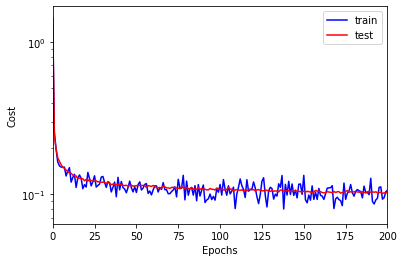

In [130]:
metrics.plot_cost_curves()

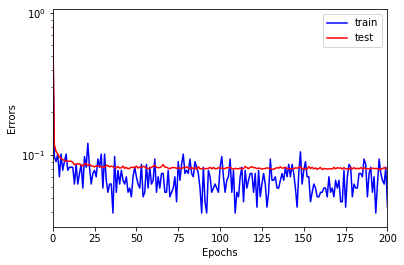

Train/test error after epoch 200: 0.042969, 0.080929


In [131]:
metrics.plot_error_curves()
metrics.print_latest_errors()

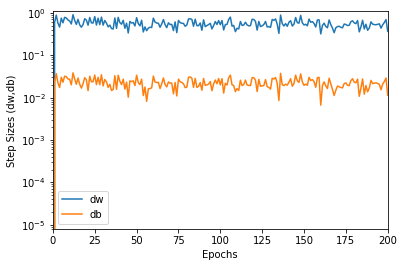

In [132]:
metrics.plot_stepsize_curves()

In [133]:
result_set = {}

In [134]:
# Testing other number of epochs and learning rates - this takes a long time to run
# To recreate the plots use the cell below to load 'result_set'

for lr in [0.1, 0.25]:
    for nepochs in [150, 250, 500]:
        print('############### lr={} nepochs={} ##############'.format(lr, nepochs))
        W,b = initialize_params(28*28, 10, random=True)
        params, metrics = optimize(W, b, x_train, y_train, x_test, y_test, 
                                   nepochs=nepochs, alpha = lr,
                                   batchsize=256, debug=True)
        key = 'lr{}-epochs{}'.format(lr, nepochs)
        result_set[key] = (params, metrics)

############### lr=0.1 nepochs=150 ##############
Optimisation with batchsize 256 and 218 number of batches per epoch.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Train/test error after epoch 1: 0.074219, 0.109143
Train/test cost after epoch 1: 0.167392, 0.182245
Train/test error after epoch 2: 0.089844, 0.110857
Train/test cost after epoch 2: 0.164868, 0.165897
Train/test error after epoch 3: 0.089844, 0.099857
Train/test cost after epoch 3: 0.143951, 0.146797
Train/test error after epoch 4: 0.101562, 0.096714
Train/test cost after epoch 4: 0.137211, 0.138535
Train/test error after epoch 5: 0.089844, 0.092357
Train/test cost after epoch 5: 0.123854, 0.139661
Train/test error after epoch 6: 0.097656, 0.089571
Train/test cost after epoch 6: 0.137493, 0.130288
Train/test error after epoch 7: 0.097656, 0.094286
Train/test cost after epoch 7: 0.115256, 0.136710
Train/test error after epoch 8: 0.093750, 0.091643
Train/test cost after epoch 8: 0.132364, 0.125822
Train/test error after epoch 9: 0.070312, 0.091071
Train/test cost after epoch 9: 0.115989, 0.128733
Train/test error after epoch 10: 0.078125, 0.084357
Train/test cost after epoch 10: 0.13201

Train/test error after epoch 81: 0.082031, 0.080357
Train/test cost after epoch 81: 0.095602, 0.101678
Train/test error after epoch 82: 0.113281, 0.086643
Train/test cost after epoch 82: 0.116134, 0.103853
Train/test error after epoch 83: 0.050781, 0.081857
Train/test cost after epoch 83: 0.093944, 0.100818
Train/test error after epoch 84: 0.082031, 0.081714
Train/test cost after epoch 84: 0.125509, 0.103963
Train/test error after epoch 85: 0.074219, 0.082286
Train/test cost after epoch 85: 0.090312, 0.103004
Train/test error after epoch 86: 0.050781, 0.081071
Train/test cost after epoch 86: 0.082479, 0.101419
Train/test error after epoch 87: 0.093750, 0.083643
Train/test cost after epoch 87: 0.105014, 0.101689
Train/test error after epoch 88: 0.089844, 0.087000
Train/test cost after epoch 88: 0.122481, 0.104907
Train/test error after epoch 89: 0.078125, 0.080643
Train/test cost after epoch 89: 0.100892, 0.098506
Train/test error after epoch 90: 0.074219, 0.085286
Train/test cost after

Train/test error after epoch 8: 0.070312, 0.086857
Train/test cost after epoch 8: 0.101175, 0.126152
Train/test error after epoch 9: 0.105469, 0.086643
Train/test cost after epoch 9: 0.121174, 0.120882
Train/test error after epoch 10: 0.085938, 0.089929
Train/test cost after epoch 10: 0.120072, 0.120859
Train/test error after epoch 11: 0.101562, 0.090857
Train/test cost after epoch 11: 0.119318, 0.121754
Train/test error after epoch 12: 0.101562, 0.088214
Train/test cost after epoch 12: 0.118267, 0.119610
Train/test error after epoch 13: 0.078125, 0.086643
Train/test cost after epoch 13: 0.130865, 0.117680
Train/test error after epoch 14: 0.132812, 0.083286
Train/test cost after epoch 14: 0.132850, 0.114285
Train/test error after epoch 15: 0.097656, 0.088429
Train/test cost after epoch 15: 0.115148, 0.116085
Train/test error after epoch 16: 0.046875, 0.087857
Train/test cost after epoch 16: 0.093561, 0.121723
Train/test error after epoch 17: 0.078125, 0.084214
Train/test cost after epo

Train/test error after epoch 88: 0.058594, 0.081214
Train/test cost after epoch 88: 0.095143, 0.101176
Train/test error after epoch 89: 0.058594, 0.085071
Train/test cost after epoch 89: 0.100453, 0.103891
Train/test error after epoch 90: 0.042969, 0.083429
Train/test cost after epoch 90: 0.099911, 0.102798
Train/test error after epoch 91: 0.046875, 0.083143
Train/test cost after epoch 91: 0.092648, 0.100880
Train/test error after epoch 92: 0.066406, 0.082929
Train/test cost after epoch 92: 0.104649, 0.103934
Train/test error after epoch 93: 0.046875, 0.085714
Train/test cost after epoch 93: 0.099671, 0.107396
Train/test error after epoch 94: 0.050781, 0.079500
Train/test cost after epoch 94: 0.102619, 0.102893
Train/test error after epoch 95: 0.070312, 0.085286
Train/test cost after epoch 95: 0.114503, 0.106300
Train/test error after epoch 96: 0.066406, 0.083857
Train/test cost after epoch 96: 0.097420, 0.101401
Train/test error after epoch 97: 0.074219, 0.083571
Train/test cost after

Train/test error after epoch 167: 0.062500, 0.083429
Train/test cost after epoch 167: 0.110184, 0.096216
Train/test error after epoch 168: 0.066406, 0.081286
Train/test cost after epoch 168: 0.093170, 0.097473
Train/test error after epoch 169: 0.085938, 0.080786
Train/test cost after epoch 169: 0.093917, 0.097720
Train/test error after epoch 170: 0.054688, 0.081786
Train/test cost after epoch 170: 0.092901, 0.099366
Train/test error after epoch 171: 0.054688, 0.082429
Train/test cost after epoch 171: 0.081180, 0.095887
Train/test error after epoch 172: 0.070312, 0.084286
Train/test cost after epoch 172: 0.099867, 0.096927
Train/test error after epoch 173: 0.050781, 0.083429
Train/test cost after epoch 173: 0.095798, 0.099057
Train/test error after epoch 174: 0.070312, 0.084214
Train/test cost after epoch 174: 0.093657, 0.098922
Train/test error after epoch 175: 0.066406, 0.083143
Train/test cost after epoch 175: 0.106551, 0.098078
Train/test error after epoch 176: 0.066406, 0.085000
Tr

Train/test error after epoch 246: 0.074219, 0.082714
Train/test cost after epoch 246: 0.099033, 0.096245
Train/test error after epoch 247: 0.054688, 0.085071
Train/test cost after epoch 247: 0.099214, 0.097927
Train/test error after epoch 248: 0.078125, 0.086143
Train/test cost after epoch 248: 0.089848, 0.097315
Train/test error after epoch 249: 0.070312, 0.084500
Train/test cost after epoch 249: 0.086559, 0.098871
Train/test error after epoch 250: 0.058594, 0.081357
Train/test cost after epoch 250: 0.085652, 0.094188
Train/test cost after epoch 250: 0.085652, 0.094188
Train/test error after epoch 250: 0.058594, 0.081357
############### lr=0.1 nepochs=500 ##############
Optimisation with batchsize 256 and 218 number of batches per epoch.
Train/test error after epoch 1: 0.144531, 0.123143
Train/test cost after epoch 1: 0.206780, 0.187044
Train/test error after epoch 2: 0.078125, 0.094714
Train/test cost after epoch 2: 0.149628, 0.161379
Train/test error after epoch 3: 0.078125, 0.09542

Train/test error after epoch 74: 0.074219, 0.082286
Train/test cost after epoch 74: 0.110145, 0.101740
Train/test error after epoch 75: 0.074219, 0.084786
Train/test cost after epoch 75: 0.086929, 0.102133
Train/test error after epoch 76: 0.070312, 0.080429
Train/test cost after epoch 76: 0.084210, 0.101557
Train/test error after epoch 77: 0.066406, 0.081857
Train/test cost after epoch 77: 0.110545, 0.102719
Train/test error after epoch 78: 0.042969, 0.080357
Train/test cost after epoch 78: 0.087076, 0.101368
Train/test error after epoch 79: 0.074219, 0.084643
Train/test cost after epoch 79: 0.115899, 0.103184
Train/test error after epoch 80: 0.046875, 0.080786
Train/test cost after epoch 80: 0.095841, 0.102189
Train/test error after epoch 81: 0.066406, 0.083286
Train/test cost after epoch 81: 0.090484, 0.102489
Train/test error after epoch 82: 0.097656, 0.082357
Train/test cost after epoch 82: 0.110069, 0.100310
Train/test error after epoch 83: 0.050781, 0.079500
Train/test cost after

Train/test error after epoch 153: 0.039062, 0.081429
Train/test cost after epoch 153: 0.076980, 0.099339
Train/test error after epoch 154: 0.097656, 0.082643
Train/test cost after epoch 154: 0.101041, 0.099849
Train/test error after epoch 155: 0.058594, 0.084214
Train/test cost after epoch 155: 0.098717, 0.097737
Train/test error after epoch 156: 0.050781, 0.082714
Train/test cost after epoch 156: 0.085369, 0.099669
Train/test error after epoch 157: 0.042969, 0.083071
Train/test cost after epoch 157: 0.086072, 0.099622
Train/test error after epoch 158: 0.074219, 0.082643
Train/test cost after epoch 158: 0.098324, 0.101024
Train/test error after epoch 159: 0.070312, 0.082929
Train/test cost after epoch 159: 0.090119, 0.097769
Train/test error after epoch 160: 0.070312, 0.085071
Train/test cost after epoch 160: 0.106347, 0.099544
Train/test error after epoch 161: 0.058594, 0.085214
Train/test cost after epoch 161: 0.104986, 0.103327
Train/test error after epoch 162: 0.062500, 0.082929
Tr

Train/test error after epoch 232: 0.074219, 0.087786
Train/test cost after epoch 232: 0.092919, 0.102181
Train/test error after epoch 233: 0.050781, 0.083571
Train/test cost after epoch 233: 0.098045, 0.097808
Train/test error after epoch 234: 0.078125, 0.082929
Train/test cost after epoch 234: 0.109095, 0.096945
Train/test error after epoch 235: 0.046875, 0.082786
Train/test cost after epoch 235: 0.067506, 0.094585
Train/test error after epoch 236: 0.062500, 0.082429
Train/test cost after epoch 236: 0.100183, 0.095950
Train/test error after epoch 237: 0.070312, 0.083071
Train/test cost after epoch 237: 0.111085, 0.095544
Train/test error after epoch 238: 0.082031, 0.083071
Train/test cost after epoch 238: 0.105563, 0.098849
Train/test error after epoch 239: 0.046875, 0.087143
Train/test cost after epoch 239: 0.090065, 0.099063
Train/test error after epoch 240: 0.058594, 0.085500
Train/test cost after epoch 240: 0.096064, 0.098507
Train/test error after epoch 241: 0.082031, 0.086643
Tr

Train/test error after epoch 311: 0.039062, 0.082214
Train/test cost after epoch 311: 0.093898, 0.096539
Train/test error after epoch 312: 0.062500, 0.083786
Train/test cost after epoch 312: 0.100937, 0.094102
Train/test error after epoch 313: 0.074219, 0.087929
Train/test cost after epoch 313: 0.098327, 0.096633
Train/test error after epoch 314: 0.085938, 0.087643
Train/test cost after epoch 314: 0.108008, 0.096808
Train/test error after epoch 315: 0.050781, 0.083786
Train/test cost after epoch 315: 0.093114, 0.096827
Train/test error after epoch 316: 0.050781, 0.084571
Train/test cost after epoch 316: 0.084303, 0.093881
Train/test error after epoch 317: 0.042969, 0.082786
Train/test cost after epoch 317: 0.082426, 0.095092
Train/test error after epoch 318: 0.101562, 0.086286
Train/test cost after epoch 318: 0.136299, 0.102644
Train/test error after epoch 319: 0.066406, 0.089714
Train/test cost after epoch 319: 0.096927, 0.095292
Train/test error after epoch 320: 0.097656, 0.087000
Tr

Train/test error after epoch 390: 0.050781, 0.082571
Train/test cost after epoch 390: 0.068643, 0.092941
Train/test error after epoch 391: 0.085938, 0.085071
Train/test cost after epoch 391: 0.096547, 0.093004
Train/test error after epoch 392: 0.070312, 0.085286
Train/test cost after epoch 392: 0.099780, 0.094253
Train/test error after epoch 393: 0.058594, 0.082571
Train/test cost after epoch 393: 0.084958, 0.092704
Train/test error after epoch 394: 0.050781, 0.087643
Train/test cost after epoch 394: 0.084572, 0.096019
Train/test error after epoch 395: 0.066406, 0.085071
Train/test cost after epoch 395: 0.104361, 0.096389
Train/test error after epoch 396: 0.078125, 0.085071
Train/test cost after epoch 396: 0.096918, 0.093704
Train/test error after epoch 397: 0.093750, 0.087929
Train/test cost after epoch 397: 0.097469, 0.093007
Train/test error after epoch 398: 0.054688, 0.082714
Train/test cost after epoch 398: 0.076687, 0.094230
Train/test error after epoch 399: 0.074219, 0.083143
Tr

Train/test error after epoch 469: 0.093750, 0.082214
Train/test cost after epoch 469: 0.113395, 0.095427
Train/test error after epoch 470: 0.062500, 0.084643
Train/test cost after epoch 470: 0.086376, 0.091376
Train/test error after epoch 471: 0.066406, 0.085000
Train/test cost after epoch 471: 0.082268, 0.092679
Train/test error after epoch 472: 0.046875, 0.082929
Train/test cost after epoch 472: 0.070217, 0.092055
Train/test error after epoch 473: 0.066406, 0.084071
Train/test cost after epoch 473: 0.080294, 0.094317
Train/test error after epoch 474: 0.054688, 0.084214
Train/test cost after epoch 474: 0.080842, 0.092045
Train/test error after epoch 475: 0.050781, 0.084786
Train/test cost after epoch 475: 0.107884, 0.092654
Train/test error after epoch 476: 0.097656, 0.083643
Train/test cost after epoch 476: 0.109982, 0.093327
Train/test error after epoch 477: 0.089844, 0.091429
Train/test cost after epoch 477: 0.119765, 0.096581
Train/test error after epoch 478: 0.054688, 0.083857
Tr

Train/test error after epoch 46: 0.105469, 0.089357
Train/test cost after epoch 46: 0.052312, 0.067495
Train/test error after epoch 47: 0.058594, 0.086571
Train/test cost after epoch 47: 0.065376, 0.062767
Train/test error after epoch 48: 0.085938, 0.089214
Train/test cost after epoch 48: 0.077094, 0.064129
Train/test error after epoch 49: 0.105469, 0.091571
Train/test cost after epoch 49: 0.073991, 0.065525
Train/test error after epoch 50: 0.101562, 0.087929
Train/test cost after epoch 50: 0.081206, 0.065571
Train/test error after epoch 51: 0.164062, 0.175143
Train/test cost after epoch 51: 0.085316, 0.083042
Train/test error after epoch 52: 0.109375, 0.100214
Train/test cost after epoch 52: 0.070194, 0.073183
Train/test error after epoch 53: 0.085938, 0.088929
Train/test cost after epoch 53: 0.067872, 0.064541
Train/test error after epoch 54: 0.074219, 0.092286
Train/test cost after epoch 54: 0.059993, 0.065585
Train/test error after epoch 55: 0.082031, 0.087857
Train/test cost after

Train/test error after epoch 126: 0.085938, 0.090286
Train/test cost after epoch 126: 0.063354, 0.065918
Train/test error after epoch 127: 0.089844, 0.117857
Train/test cost after epoch 127: 0.078822, 0.082328
Train/test error after epoch 128: 0.054688, 0.091214
Train/test cost after epoch 128: 0.063482, 0.065024
Train/test error after epoch 129: 0.105469, 0.135143
Train/test cost after epoch 129: 0.070530, 0.079756
Train/test error after epoch 130: 0.078125, 0.094143
Train/test cost after epoch 130: 0.048690, 0.070662
Train/test error after epoch 131: 0.089844, 0.114357
Train/test cost after epoch 131: 0.088182, 0.076963
Train/test error after epoch 132: 0.058594, 0.088286
Train/test cost after epoch 132: 0.049934, 0.064840
Train/test error after epoch 133: 0.046875, 0.087214
Train/test cost after epoch 133: 0.057921, 0.066691
Train/test error after epoch 134: 0.050781, 0.081643
Train/test cost after epoch 134: 0.054718, 0.064568
Train/test error after epoch 135: 0.082031, 0.089429
Tr

Train/test error after epoch 54: 0.078125, 0.104214
Train/test cost after epoch 54: 0.055379, 0.073273
Train/test error after epoch 55: 0.070312, 0.085286
Train/test cost after epoch 55: 0.060174, 0.063650
Train/test error after epoch 56: 0.097656, 0.136071
Train/test cost after epoch 56: 0.083569, 0.089517
Train/test error after epoch 57: 0.101562, 0.084429
Train/test cost after epoch 57: 0.069748, 0.066779
Train/test error after epoch 58: 0.074219, 0.088214
Train/test cost after epoch 58: 0.059711, 0.069397
Train/test error after epoch 59: 0.093750, 0.094714
Train/test cost after epoch 59: 0.068352, 0.070325
Train/test error after epoch 60: 0.039062, 0.086214
Train/test cost after epoch 60: 0.057250, 0.069080
Train/test error after epoch 61: 0.035156, 0.084714
Train/test cost after epoch 61: 0.057473, 0.064158
Train/test error after epoch 62: 0.117188, 0.099071
Train/test cost after epoch 62: 0.085180, 0.069014
Train/test error after epoch 63: 0.093750, 0.097571
Train/test cost after

Train/test error after epoch 133: 0.070312, 0.086500
Train/test cost after epoch 133: 0.069625, 0.063614
Train/test error after epoch 134: 0.070312, 0.095071
Train/test cost after epoch 134: 0.073823, 0.069761
Train/test error after epoch 135: 0.050781, 0.088000
Train/test cost after epoch 135: 0.057591, 0.060877
Train/test error after epoch 136: 0.117188, 0.129143
Train/test cost after epoch 136: 0.078117, 0.084726
Train/test error after epoch 137: 0.082031, 0.093357
Train/test cost after epoch 137: 0.071262, 0.065001
Train/test error after epoch 138: 0.109375, 0.127714
Train/test cost after epoch 138: 0.073722, 0.085144
Train/test error after epoch 139: 0.078125, 0.084286
Train/test cost after epoch 139: 0.067636, 0.059232
Train/test error after epoch 140: 0.117188, 0.141143
Train/test cost after epoch 140: 0.093300, 0.078112
Train/test error after epoch 141: 0.074219, 0.088714
Train/test cost after epoch 141: 0.069230, 0.061283
Train/test error after epoch 142: 0.058594, 0.089143
Tr

Train/test error after epoch 212: 0.050781, 0.087143
Train/test cost after epoch 212: 0.051218, 0.065743
Train/test error after epoch 213: 0.070312, 0.088000
Train/test cost after epoch 213: 0.057983, 0.061530
Train/test error after epoch 214: 0.066406, 0.098071
Train/test cost after epoch 214: 0.046442, 0.071411
Train/test error after epoch 215: 0.085938, 0.093929
Train/test cost after epoch 215: 0.067194, 0.064781
Train/test error after epoch 216: 0.074219, 0.084643
Train/test cost after epoch 216: 0.061243, 0.063169
Train/test error after epoch 217: 0.062500, 0.093286
Train/test cost after epoch 217: 0.056680, 0.066237
Train/test error after epoch 218: 0.058594, 0.088286
Train/test cost after epoch 218: 0.063226, 0.064721
Train/test error after epoch 219: 0.066406, 0.099000
Train/test cost after epoch 219: 0.056632, 0.069387
Train/test error after epoch 220: 0.085938, 0.101071
Train/test cost after epoch 220: 0.064885, 0.066232
Train/test error after epoch 221: 0.105469, 0.105143
Tr

Train/test error after epoch 39: 0.074219, 0.096929
Train/test cost after epoch 39: 0.065295, 0.068153
Train/test error after epoch 40: 0.082031, 0.089857
Train/test cost after epoch 40: 0.064954, 0.065564
Train/test error after epoch 41: 0.109375, 0.136214
Train/test cost after epoch 41: 0.094343, 0.093154
Train/test error after epoch 42: 0.078125, 0.110714
Train/test cost after epoch 42: 0.069242, 0.076350
Train/test error after epoch 43: 0.089844, 0.090357
Train/test cost after epoch 43: 0.074548, 0.063856
Train/test error after epoch 44: 0.082031, 0.105571
Train/test cost after epoch 44: 0.086350, 0.073858
Train/test error after epoch 45: 0.074219, 0.089857
Train/test cost after epoch 45: 0.063702, 0.068903
Train/test error after epoch 46: 0.105469, 0.103071
Train/test cost after epoch 46: 0.064057, 0.074401
Train/test error after epoch 47: 0.128906, 0.131143
Train/test cost after epoch 47: 0.088281, 0.083662
Train/test error after epoch 48: 0.117188, 0.114000
Train/test cost after

Train/test error after epoch 119: 0.093750, 0.095214
Train/test cost after epoch 119: 0.076154, 0.068157
Train/test error after epoch 120: 0.078125, 0.103000
Train/test cost after epoch 120: 0.071389, 0.070060
Train/test error after epoch 121: 0.074219, 0.092214
Train/test cost after epoch 121: 0.049399, 0.065542
Train/test error after epoch 122: 0.062500, 0.105786
Train/test cost after epoch 122: 0.060259, 0.074734
Train/test error after epoch 123: 0.105469, 0.107857
Train/test cost after epoch 123: 0.070991, 0.069078
Train/test error after epoch 124: 0.074219, 0.094429
Train/test cost after epoch 124: 0.070957, 0.069892
Train/test error after epoch 125: 0.046875, 0.089000
Train/test cost after epoch 125: 0.044199, 0.063486
Train/test error after epoch 126: 0.093750, 0.114429
Train/test cost after epoch 126: 0.077250, 0.077089
Train/test error after epoch 127: 0.082031, 0.094000
Train/test cost after epoch 127: 0.063861, 0.066276
Train/test error after epoch 128: 0.078125, 0.094714
Tr

Train/test error after epoch 198: 0.101562, 0.103214
Train/test cost after epoch 198: 0.065641, 0.067415
Train/test error after epoch 199: 0.089844, 0.107500
Train/test cost after epoch 199: 0.076071, 0.071565
Train/test error after epoch 200: 0.105469, 0.098000
Train/test cost after epoch 200: 0.067047, 0.067266
Train/test error after epoch 201: 0.070312, 0.096500
Train/test cost after epoch 201: 0.056435, 0.067406
Train/test error after epoch 202: 0.085938, 0.088500
Train/test cost after epoch 202: 0.063389, 0.064416
Train/test error after epoch 203: 0.167969, 0.177786
Train/test cost after epoch 203: 0.071359, 0.077054
Train/test error after epoch 204: 0.054688, 0.087714
Train/test cost after epoch 204: 0.066028, 0.063689
Train/test error after epoch 205: 0.097656, 0.087857
Train/test cost after epoch 205: 0.074102, 0.063689
Train/test error after epoch 206: 0.078125, 0.088500
Train/test cost after epoch 206: 0.067383, 0.063527
Train/test error after epoch 207: 0.046875, 0.097429
Tr

Train/test error after epoch 277: 0.058594, 0.096429
Train/test cost after epoch 277: 0.058172, 0.065199
Train/test error after epoch 278: 0.046875, 0.086643
Train/test cost after epoch 278: 0.044491, 0.061264
Train/test error after epoch 279: 0.128906, 0.124357
Train/test cost after epoch 279: 0.098938, 0.079881
Train/test error after epoch 280: 0.066406, 0.086786
Train/test cost after epoch 280: 0.057489, 0.064306
Train/test error after epoch 281: 0.089844, 0.122000
Train/test cost after epoch 281: 0.067254, 0.076944
Train/test error after epoch 282: 0.070312, 0.098571
Train/test cost after epoch 282: 0.060001, 0.069406
Train/test error after epoch 283: 0.078125, 0.099714
Train/test cost after epoch 283: 0.064950, 0.067215
Train/test error after epoch 284: 0.109375, 0.092857
Train/test cost after epoch 284: 0.075836, 0.062455
Train/test error after epoch 285: 0.074219, 0.089214
Train/test cost after epoch 285: 0.059209, 0.060614
Train/test error after epoch 286: 0.101562, 0.118286
Tr

Train/test error after epoch 356: 0.097656, 0.115143
Train/test cost after epoch 356: 0.064073, 0.079729
Train/test error after epoch 357: 0.074219, 0.084929
Train/test cost after epoch 357: 0.061346, 0.059726
Train/test error after epoch 358: 0.074219, 0.094929
Train/test cost after epoch 358: 0.047025, 0.064996
Train/test error after epoch 359: 0.070312, 0.098857
Train/test cost after epoch 359: 0.059216, 0.067578
Train/test error after epoch 360: 0.066406, 0.092143
Train/test cost after epoch 360: 0.044400, 0.061952
Train/test error after epoch 361: 0.074219, 0.104571
Train/test cost after epoch 361: 0.061631, 0.071792
Train/test error after epoch 362: 0.113281, 0.123643
Train/test cost after epoch 362: 0.073723, 0.078414
Train/test error after epoch 363: 0.089844, 0.090929
Train/test cost after epoch 363: 0.064008, 0.065141
Train/test error after epoch 364: 0.039062, 0.096214
Train/test cost after epoch 364: 0.047631, 0.063248
Train/test error after epoch 365: 0.085938, 0.087143
Tr

Train/test error after epoch 435: 0.085938, 0.090929
Train/test cost after epoch 435: 0.071940, 0.060199
Train/test error after epoch 436: 0.089844, 0.104071
Train/test cost after epoch 436: 0.059876, 0.068586
Train/test error after epoch 437: 0.058594, 0.090143
Train/test cost after epoch 437: 0.065949, 0.063031
Train/test error after epoch 438: 0.085938, 0.105500
Train/test cost after epoch 438: 0.074280, 0.077674
Train/test error after epoch 439: 0.195312, 0.190714
Train/test cost after epoch 439: 0.063415, 0.077912
Train/test error after epoch 440: 0.070312, 0.089357
Train/test cost after epoch 440: 0.056516, 0.060141
Train/test error after epoch 441: 0.078125, 0.098214
Train/test cost after epoch 441: 0.070612, 0.066507
Train/test error after epoch 442: 0.070312, 0.100000
Train/test cost after epoch 442: 0.049103, 0.067348
Train/test error after epoch 443: 0.109375, 0.129214
Train/test cost after epoch 443: 0.069486, 0.077902
Train/test error after epoch 444: 0.097656, 0.133143
Tr

In [23]:
with open('result_set.dict', 'rb') as fh:
    result_set = pickle.load(fh)

In [24]:
result_set

{'lr0.1-epochs150': ({'W': array([[-0.00898472,  0.00086925, -0.04045966, ...,  0.02766642,
            0.02888049,  0.02313739],
          [ 0.01781191,  0.01351387,  0.01041557, ...,  0.0202606 ,
            0.02826266, -0.00212946],
          [ 0.01601741,  0.00728703, -0.0493924 , ..., -0.00456987,
            0.0355385 , -0.03171868],
          ...,
          [ 0.00278664, -0.00297691, -0.00395741, ...,  0.0276804 ,
            0.06371489, -0.03445053],
          [ 0.03289195,  0.00875675, -0.0241836 , ..., -0.00168968,
            0.02529237,  0.00122944],
          [ 0.0887926 ,  0.06525899, -0.02745943, ..., -0.01489663,
           -0.03022583, -0.02818467]]), 'b': array([[-0.02068856],
          [-0.1008311 ],
          [ 0.09435832],
          [ 0.08479936],
          [-0.12505938],
          [ 0.08871874],
          [-0.01278108],
          [-0.0139864 ],
          [ 0.03977103],
          [-0.03430093]])}, <__main__.Metrics at 0x7f115bd1e8d0>),
 'lr0.1-epochs250': ({'W': ar

In [143]:
with open('result_set.dict', 'wb') as fh:
    pickle.dump(result_set, fh)

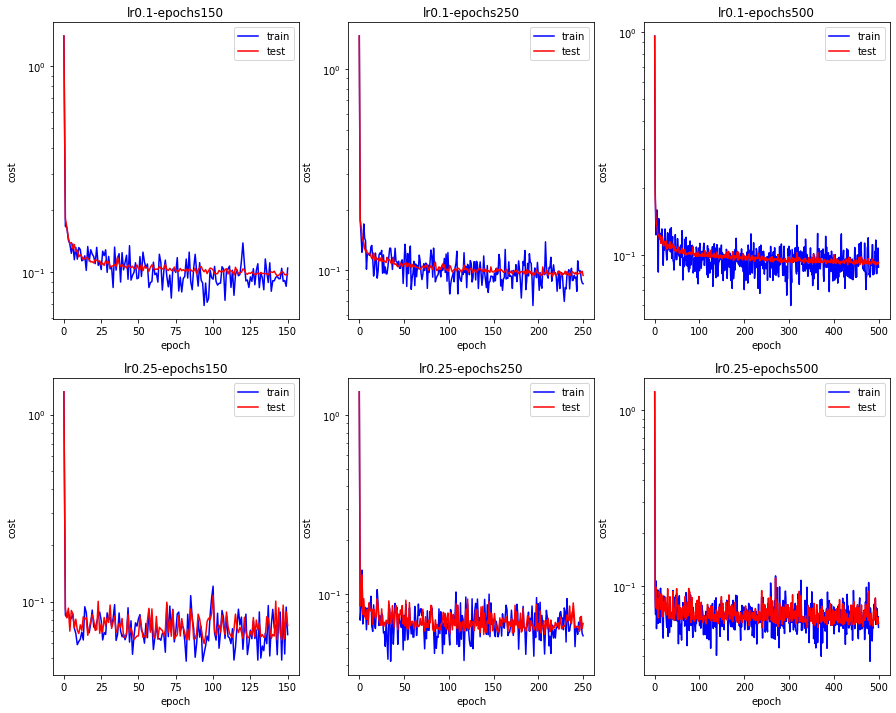

In [136]:
# Plotting cost functions
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()
x = None
for i, kv in enumerate(result_set.items()):
    ax = axes[i]
    ax.set_yscale('log')
    ax.set_ylabel('cost')
    ax.set_xlabel('epoch')
    ax.set_title(kv[0])
    metrics = kv[1][1]
    
    # plt.semilogy(self.epochs, self.train_errors_last, "b", label="train")
    # plt.semilogy(self.epochs, self.test_errors_last, "r", label="test")
    ax.plot(metrics.epochs, metrics.train_costs_last, "b", label="train")
    ax.plot(metrics.epochs, metrics.test_costs_last, "r", label="test")
    x = metrics
    ax.legend()

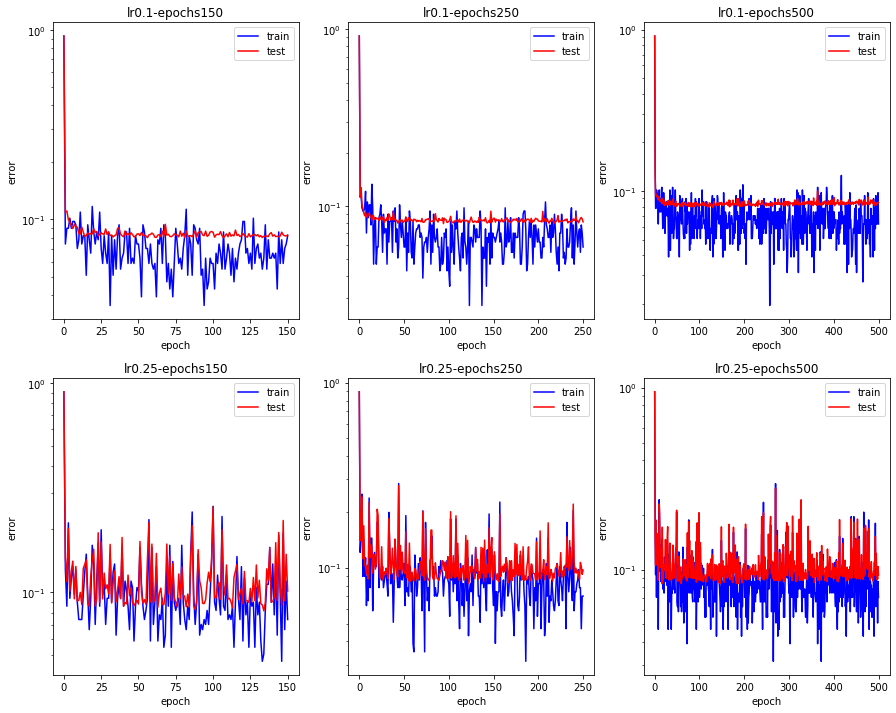

In [137]:
# Plotting Errors
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()
for i, kv in enumerate(result_set.items()):
    ax = axes[i]
    ax.set_yscale('log')
    ax.set_ylabel('error')
    ax.set_xlabel('epoch')
    ax.set_title(kv[0])
    metrics = kv[1][1]
    
    # plt.semilogy(self.epochs, self.train_errors_last, "b", label="train")
    # plt.semilogy(self.epochs, self.test_errors_last, "r", label="test")
    ax.plot(metrics.epochs, metrics.train_errors_last, "b", label="train")
    ax.plot(metrics.epochs, metrics.test_errors_last, "r", label="test")
    ax.legend()

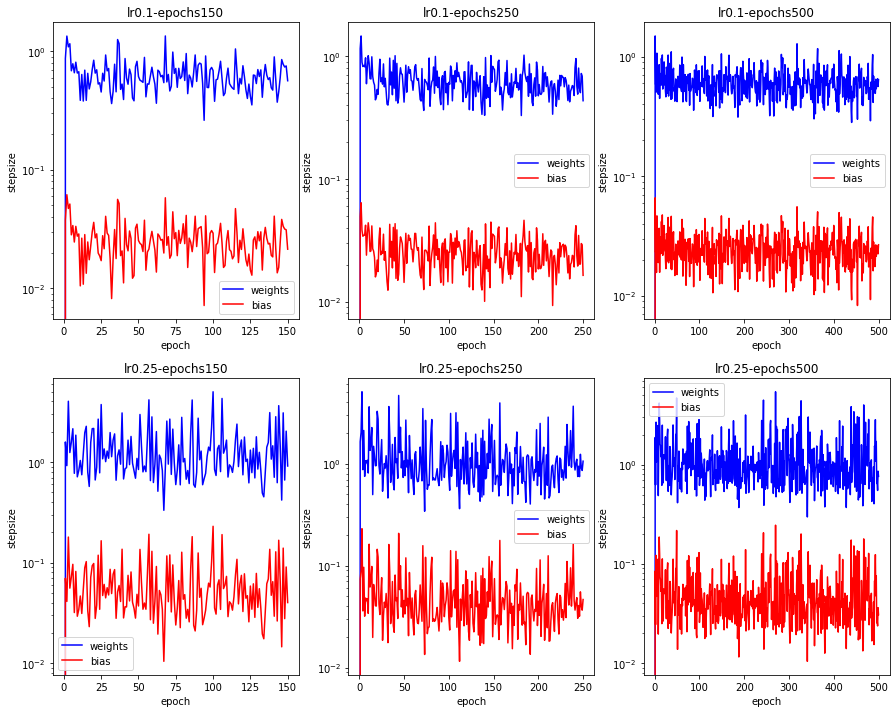

In [139]:
# Plotting Errors
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()
for i, kv in enumerate(result_set.items()):
    ax = axes[i]
    ax.set_yscale('log')
    ax.set_ylabel('stepsize')
    ax.set_xlabel('epoch')
    ax.set_title(kv[0])
    metrics = kv[1][1]
    
    # plt.semilogy(self.epochs, self.train_errors_last, "b", label="train")
    # plt.semilogy(self.epochs, self.test_errors_last, "r", label="test")
    ax.plot(metrics.epochs, metrics.stepsize_w_last, "b", label="weights")
    ax.plot(metrics.epochs, metrics.stepsize_b_last, "r", label="bias")
    ax.legend()

### Describe your Findings for Exercise 1b

By running the training with different settings for learning rate, number of epochs, batch size explore which combination is best suited to obtain good test performance. Keep an eye on random estimates for the error rates due to random parameter initialisation and randomly shuffled mini-batches. 

Specify your choice of these hyper-parameters and justify why you consider your choice best suited.

#### Findings
The plots above show the Epoch-Nr. vs. cost function values, epoch-nr vs. error and epoch-nr. vs. stepsize.
Comparing the Cost function plots we can conclude that a learning rate of `0.1` seems to be adequate, whereas the learning rate of `0.25` leads to wiggled cost function plot lines. We can conclude from these plots that a learning rate seems to be adequate as the test cost-function value seems to be more stable.

Looking at the errors seems to proofe that, as we see in the plots with the learning rate of `0.25` that the error variance on the test set is very high whereas it is not when looking at the plots with a learning rate of `0.1`.

Comparing the plots we would go for a model with learning rate `0.1` and 500 epochs.

#### Plot the Misclassified Images

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


1384
[[7 4 7 9 7 9 0 9 2 7 6 9 3 2 9 5 8 9 9 8 8 9 1 9 7]]
[9 2 4 8 3 5 3 4 1 4 8 4 8 4 7 1 5 4 7 3 6 4 3 4 8]


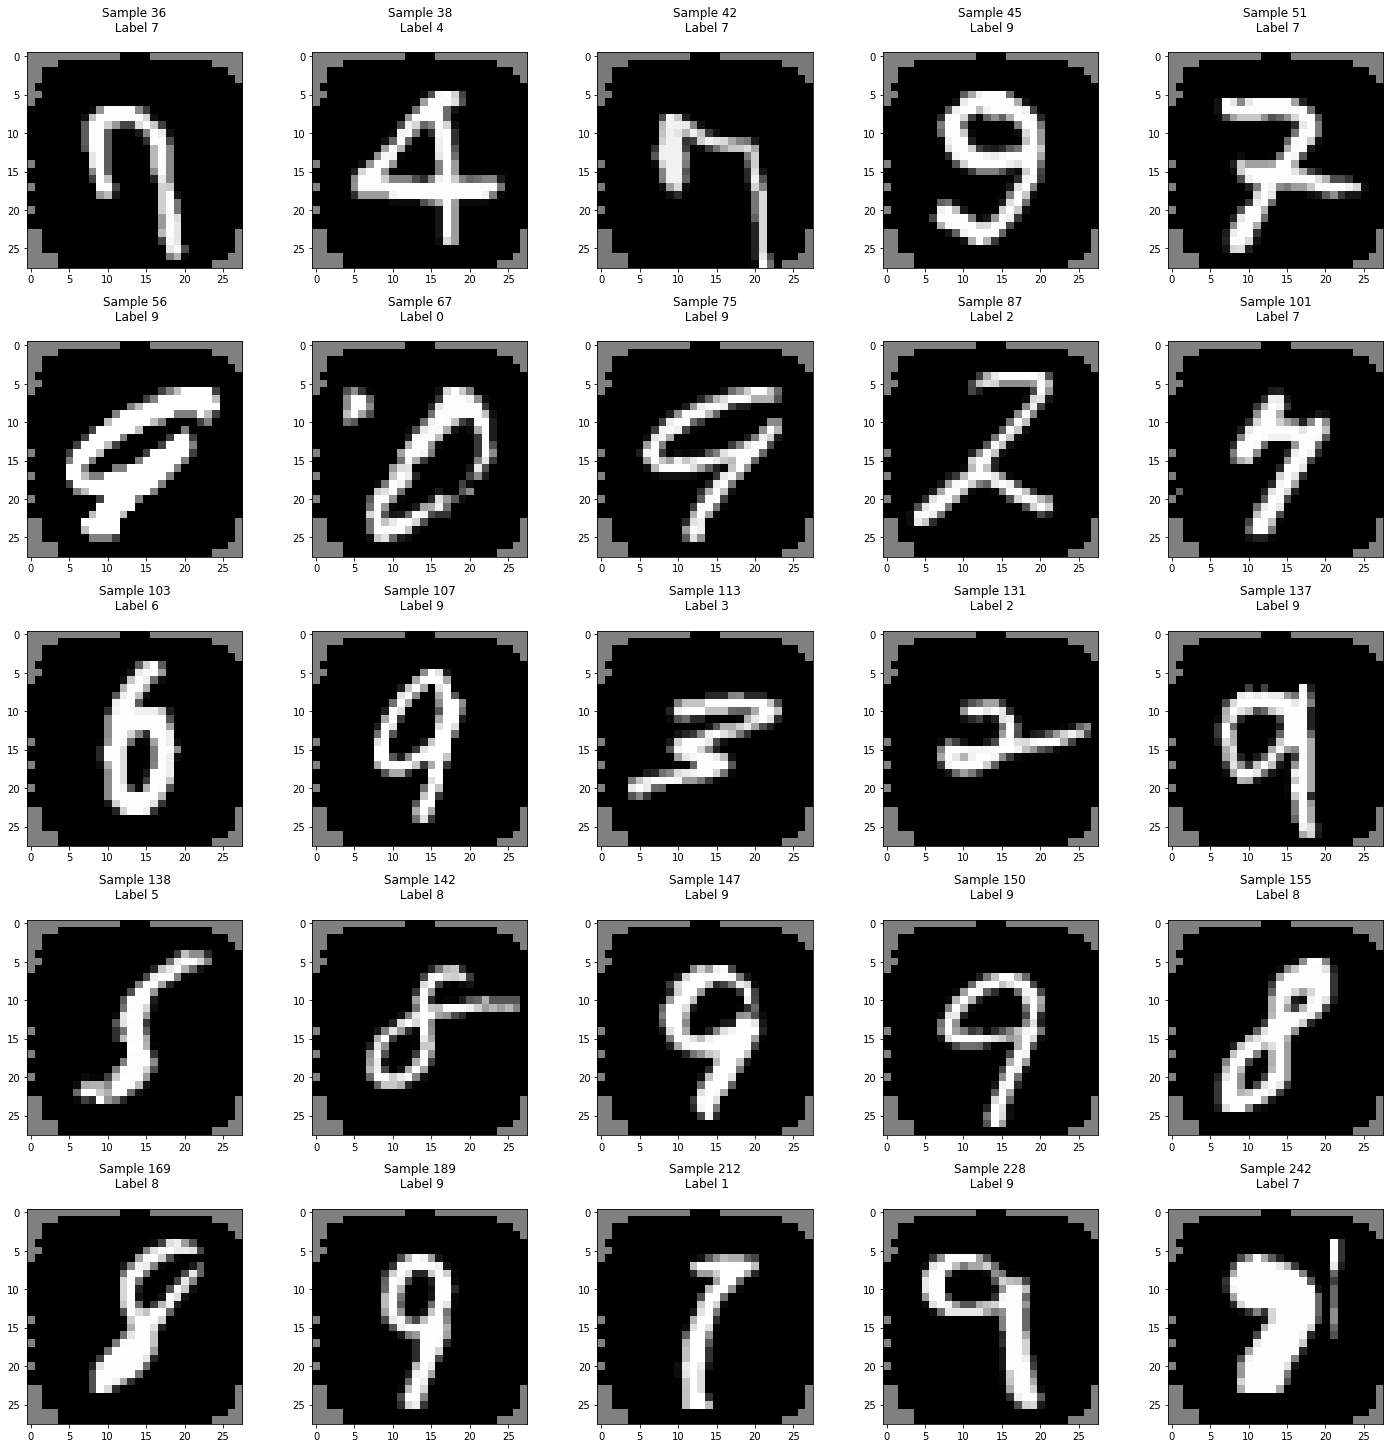

In [140]:
y_pred = predict(params['W'], params['b'], x_test)
yhat = np.argmax(y_pred, axis=0)
indices = np.where(yhat != y_test)[1]
print(len(indices))

plot_digits(x_test, y_test, indices[0:25], shape)
print(y_test[:,indices[0:25]])
print(yhat[indices[0:25]])

### Plot the Trained Weights as Image 

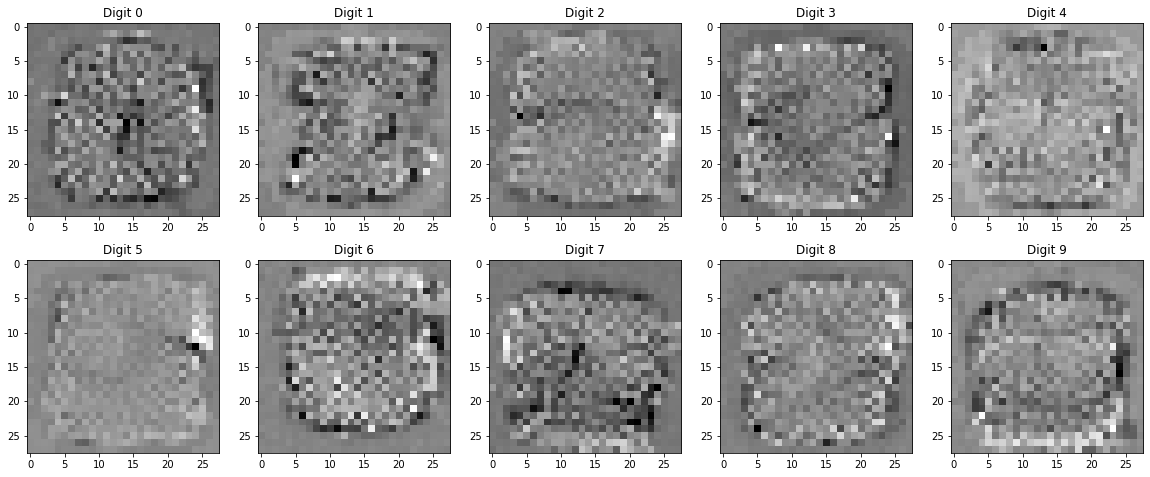

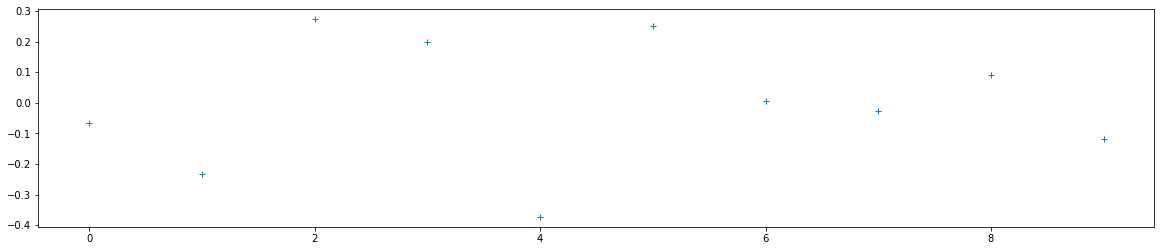

In [141]:
weights = params['W']
biases = params['b']
cols = 5
rows = 2
plt.figure(figsize=(20,4*rows))
for i in range(10):
    plt.subplot(rows, cols, i+1)
    plt.imshow(np.reshape(weights[i], (28,28)), cmap=plt.cm.gray)
    plt.title('Digit %i'%i, fontsize = 12)

plt.figure(figsize=(20,4))
plt.plot(range(10), [biases[i] for i in range(10)], '+')
